# TP 5

## 1.1. Preprocesamiento de datos

1. A la hora de preparar los datos antes de ser entrenados existen tres acciones basicas a realizar, explique en que consiste cada una de las siguientes y como se implementarian en Python:
  - a) Mean subtraction
  - b) Normalization
  - c) Scaling


## 1.1.1.a Mean subtraction


## 1.1.1.b Normalization
https://docs.microsoft.com/es-es/azure/machine-learning/team-data-science-process/prepare-data

La normalización de datos escala los valores numéricos a un intervalo especificado. 
Entre los métodos de normalización de datos más conocidos se incluyen:
  - Normalización mínima-máxima
  - Normalización de puntuación z
  - Escalado decimal

### Normalización mínima maxima
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Transforma linealmente los datos a un intervalo, por ejemplo, entre 0 y 1, donde el valor mímino se escala a 0 y el máximo a 1.


In [26]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()

scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.data_max_

scaler.transform(data)


array([[ 0.  ,  0.  ],
       [ 0.25,  0.25],
       [ 0.5 ,  0.5 ],
       [ 1.  ,  1.  ]])

### Normalización de puntuación z
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.zscore.html

Escale los datos en función de la desviación estándar y media: divida la diferencia entre los datos y la media por la desviación estándar.

In [27]:
a = np.array([ 0.7972,  0.0767,  0.4383,  0.7866,  0.8091,  0.1954,
                   0.6307, 0.6599,  0.1065,  0.0508])
from scipy import stats
stats.zscore(a)

array([ 1.12724554, -1.2469956 , -0.05542642,  1.09231569,  1.16645923,
       -0.8558472 ,  0.57858329,  0.67480514, -1.14879659, -1.33234306])

### Escalado decimal
Escala los datos moviendo la coma decimal del valor del atributo.

## 1.1.1.c Scaling
Es una  técnica que se basa en redimensionar la frecuencia de muestreo de un  valor mayor  a un  valor menor. De esta manera podría usarse una  regla  de decisión  de acuerdo a la cantidad de información  contenida  en  la frecuencia mayor  dentro de cada intervalo de la frecuencia menor para elegir si la observación será una medida de  tendencia  de las observaciones  existentes o se  considerará un vacío  en la información. 

El scaling [http://scikit-learn.org] es un tipo de estandarización alternativa en la que existe un rango de valores situados entre un valor mínimo y máximo dado, a menudo entre cero y uno, o de manera que el valor absoluto máximo de cada característica se escala al tamaño de la unidad. Esto se puede lograr usando MinMaxScaler o MaxAbsScaler, respectivamente.


In [ ]:
from sklearn import preprocessing

In [ ]:
x = np.array([
    [1,2,3],
    [2,1,2],
    [5,4,3],
    [10,100,15]
])

In [ ]:
x

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)
x

## 1.2. Introduccion a aprendizaje automatico
  - 1) Dentro del aprendizaje automatico, contamos con varias áreas de aplicación, entre ellas podemos encontrar: clasificación, regresiones, clustering y reducción de dimensiones. Explique que problemas resuelven los métodos que se encuentran dentro de estas áreas, explique un método dentro de cada una de ellas y de una posible aplicación.
  - 2) La cantidad de datos disponibles para entrenamiento pueden condicionar la elección de algún método sobre otro? y el tipo de dato?
  - 3) En la implementación cual es el pipe utilizado para analizar datos con una SVM? Explique parametros y función de cada paso.

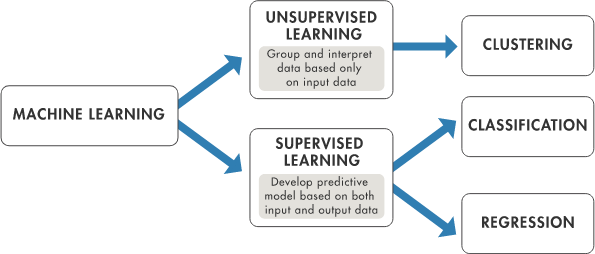

### 1-2-1 Clasificación: 
Un sistema de clasificación predice una categoría. Los modelos de clasificación organizan los datos de entrada en categorías. 

• Bagging: Se basa en perturbar la composición de los datos del conjunto de aprendizaje. Con cada conjunto de datos se entrena un clasificador base y entonces se obtiene la respuesta final para una nueva instancia, mediante un esquema de votación en el que intervienen todos los clasificadores entrenados (por ejemplo, voto por mayoría) • Este procedimiento reduce la porción del error en la precisión del clasificador que se  puede imputar a la variabilidad asociada a los conjuntos de entrenamiento
• Boosting: En este caso se trata de entrenar distintos clasificadores que complementen a otros. Un primer clasificador se entrona, y las instancias  sobre las que este clasificador comete errores, se les adjudica un peso mayor que los ejemplos clasificados correctamente. Entonces, un nuevo clasificador (posiblemente diferente) se entrena con los mismos datos de
entrenamiento pero centrándose en los ejemplos con más peso, y así, sucesivamente.

Algunos algoritmos habituales para realizar la clasificación son: máquina de vectores de soporte (SVM), árboles de decisión boosted y bagged, k-vecino más cercano, clasificadores bayesianos (Naïve Bayes), análisis discriminante, regresión logística y redes neuronales.

Ejemplo:
Un ejemplo de aplicación sería catalogar imágenes para generar álbumes en base a coordenadas.
Las aplicaciones más habituales son las imágenes médicas, el reconocimiento de voz y la calificación crediticia.

### 1-2-1 Regresión: 
Regresión simple: Consiste en describir la relación entre las dos variables mediante una recta.
Regresión logística: En algunas ocasiones, la variable respuesta no es una variable continua sino que se sabe que tiene una distribución discreta como puede ser una Poisson o una Binomial.
Regresión múltiple: Un método multivariado para determinar una ecuación de regresión o predicción para predecir un valor de la variable dependiente a partir de un conjunto de variables independientes.

Las técnicas de regresión predicen respuestas continuas; por ejemplo, cambios de temperatura o fluctuaciones en la demanda energética. Las aplicaciones más habituales son la predicción de la carga eléctrica y el trading algorítmico.

Los algoritmos más habituales son: modelo lineal, modelo no lineal, regularización, regresión por pasos, árboles de decisión boosted y bagged, redes neuronales y aprendizaje neurodifuso adaptativo.

Ejemplos:
una regresión predice un número, como por ejemplo cuál va a ser el precio de un artículo, o el número de ventas de determinados pasajes en una aerolínea.
Otro ejemplo, determinar el valor de una propiedad en base a atributos.
Un grupo de 20 alumnos estuvieron entre 0 y 6 horas estudiando para un examen. Nos preguntamos cómo el número de horas estudiando para un examen afecta la probabilidad del alumno de pasar el examen?

### 1-2-1 Clustering: 
Un cluster es por tanto una colección de objetos que son “similares” entre ellos y “diferentes” a los objetos que pertenecen a otros clusters

• Agrupamiento exclusivo: En este caso los datos se agrupan de un modo exclusivo, de modo que si un dato pertenece a un cluster entonces no puede estar incluido en otro. Un ejemplo de este tipo de algoritmos es el algoritmo K‐Means
• Agrupamiento solapado: En este caso se utilizan conjuntos difusos para agrupar los datos, de forma que cada punto puede pertenecer a dos o más clusters con diferentes grados de pertenencia. El ejemplo más representativo de este tipo de algoritmos es el algoritmo Fuzzy C‐means
• Agrupamiento jerárquico: Este tipo de algoritmos se basa en la unión sucesiva de los dos clusters más próximos. La condición inicial se establece fijando cada dato como un cluster y después de cierto número de iteraciones se consigue un árbol o dendograma, donde cada nivel proporciona un agrupamiento de los datos. Dentro de este tipo se encuentra
cualquier versión del algoritmo Hierarchical clustering
• Agrupamiento probabilista: En esta caso se utiliza una aproximación completamente probabilista para resolver el problema y el ejemplo más representativo es la mezcla de Gaussianas (Mixture of Gaussians)

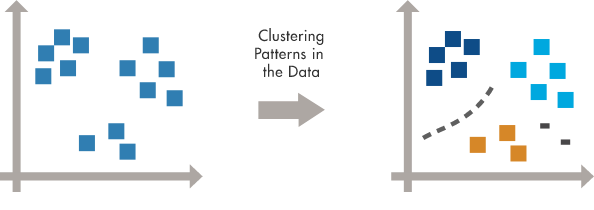

Algunos algoritmos habituales para realizar el clustering son: k-means y k-medoids, clustering jerárquico, modelos de mezclas gaussianas, modelos de Markov ocultos, mapas autoorganizados, clustering difuso de c-means y clustering sustractivo.

Ejemplos de clustering: 
    Agrupar genes y proteínas con similar funcionalidad.
    Agrupar documentos para explorarlos más rápido
    Agrupar condiciones climáticas para distribución de los biomas mundiales
    

### 1-2-1 Reducción de la dimensión:
Es el proceso de reducción del número de variables aleatorias que se trate y se puede dividir en selección de función y extracción de función.
Los métodos de reducción de dimensionalidad son técnicas algorítmicas que se basan en el mapeado de un conjunto de datos dado en n dimensiones en un subespacio derivado del espacio original de m dimensiones siendo m<n, lo que nos permite encontrar una descripción de los datos a un coste menor. 
Las técnicas más utilizadas es el PCA --> 
. El método PSA trata de representar un conjunto de datos en un sub-espacio lineal de dimensionalidad reducida de forma que este aún describe de forma aceptable la varianza de los datos, es decir, que tratamos de encontrar una base lineal que reduzca la dimensionalidad de los datos donde la cantidad de la varianza sea máxima. En términos matemáticos, podemos decir que PCA, intenta encontrar un mapeado lineal M entre dos espacios de coordenadas tal que se maximice la función de coste. 

El método LLE (acrónimo del inglés Locally linear embedding) es un algoritmo de aprendizaje
no supervisado que fue propuesto por . Este algoritmo es capaz de calcular una representación
de baja dimensión manteniendo, en la representación de vecindad, suficiente información de cómo estaban los
nodos distribuidos en el espacio de entrada.

Mapas de difusión:
Los mapas de difusión se basan en la definición de Markov de camino  aleatorio en el grafo de los datos. Realizando el camino aleatorio para el número de iteraciones, se mide la proximidad de los puntos de datos obtenidos. En la representación de baja dimensión de los datos las distancias de difusión de las parejas se retienen tan bien como es posible. La idea clave detrás de la difusión de distancias es que se basa en integrar sobre todos los caminos a través del grafo. Los mapas de difusión preservan la proximidad local entre puntos de datos construyendo una representación en forma de grafo de la estructura subyacente. Los vértices o nodos de este gráfico representan los puntos de datos, y los bordes conectando los vértices, representan similitudes entre nodos adyacentes. Si es normalizado adecuadamente, estos pesos de las aristas pueden ser interpretados como la probabilidad de un recorrido concreto sobre el grafo. Después representa el gráfico como una matriz, donde las propiedades espectrales de esta matriz se utilizan para embeber los puntos de datos en un espacio de menor dimensionalidad, habitualmente un espacio tridimensional. Los métodos que utilizan mapas de difusión son por tanto especialmente interesantes cuando nos interesa realizar un estudio profundo de la topología de los datos, para descubrir interrelaciones ocultas o inferir reglas sobre el conjunto a partir del estudio del subespacio reducido.

Un ejemplo de la aplicación es el reconocimiento de caras en imágenes, mediante la distinción de variabilidad de las diferentes  caras. 


### 1-2-2
Aprendizaje supervisado:
En la regresión: Utilice técnicas de regresión si trabaja con un intervalo de datos o si la naturaleza de la respuesta es un número real, como la temperatura o el tiempo que tardará una pieza de equipamiento en fallar.
En la clasificación: Utilice la clasificación si sus datos se pueden etiquetar, categorizar o dividir en grupos o clases concretos. 

si es necesario explorar  datos y se desea entrenar un modelo para localizar una buena representación interna, como la división de datos en clusters debe utilizarse aprendizaje no supervisado. 
##### Respuesta
La cantidad de datos no influye, en la selección del método a aplicar. La mayoría de algoritmos de análisis de datos requieren cerca de 100 ejemplos de datos  de entrenamiento. Los conceptos aprendidos o reglas pueden no ser suficientes si los ejemplos
disponibles no son suficientes. 
Por otro lado los tipos de datos si son indicadores de la selección del método a seleccionar. Los atributos o definiciones de los tipos de datos definen el tipo de aprendizaje.

### 1-2-3 imeplementación clasificador SVM en scikit-learn


In [ ]:
import numpy as np
X = np.array([[0, 1,0], [1, 0,0], [1, 1,0], [1, 1,1], [2,2,2], [8,7,3],[9,2,5]]) #Vector de ejemplos
y = np.array([0, 0, 0, 1,1,1,1]) #Vector de etiquetas para clasificar
from sklearn.svm import SVC # se importa Support Vector Clasificación 
clf = SVC()
clf.fit(X, y) #Ajustar el modelo SVM de acuerdo con los datos de entrenamiento dados
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, #Pesos asignados a las características (coeficientes en el problema primario). Esto sólo está disponible en el caso de un núcleo lineal.
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, #max_iter Límite duro de iteraciones dentro del solver, o -1 sin límite., shrinking Si usar la heurística de reducción.
    tol=0.001, verbose=True) #Tolerancia para el criterio de parada.
print(clf.predict([[0,1,0]])) #Predicción

## 1.3. Clustering
1. Describa de los siguientes metodos de clustering cual es la metrica utilizada, sus casos de uso y su escalabilidad en la implementacion.

  - a) K-Means
  - b) Mean-Shift
  - c) Gaussian mixtures

2. Llevar una imagen cualquiera (recibida por linea de comando) a 80 colores con el metodo de clustering K-Means e imprima los porcentajes de estos colores en la imagen resultante. Que aplicacion le darıa a este algoritmo?

3. Aplicar el metodo de Mean-Shift sobre el dataset IRIS.


### 1.3.2 K-Means
http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

Fitting model on a small sub-sample of the data
done in 0.469s.
Predicting color indices on the full image (k-means)
done in 0.378s.
Predicting color indices on the full image (random)
done in 0.418s.


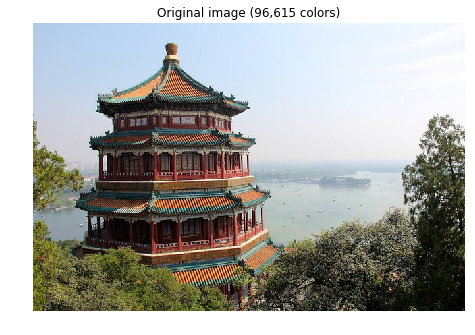

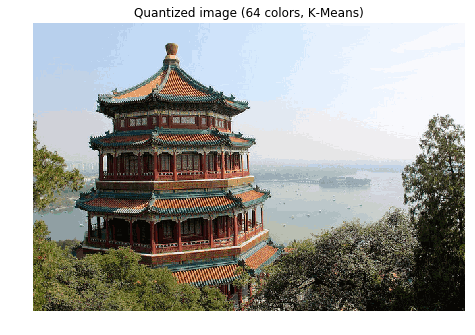

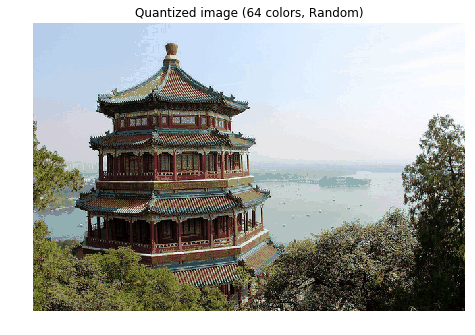

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 80

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

## 1.4. Clasificacion ##

### 1. Comente dos kernels posibles para una SVM, cuales son sus diferencias, y que tan importante es la eleccion de estos a la hora de resolver un problema. ###

### 2. Implemente sobre un mismo dataset a eleccion una SVM con dos kernels diferentes y grafiquelos. Que diferencias encontro? Para que tipo de distribucion es  util un kernel lineal? ###

### 3. Clasifique por calidad a los vinos encontrados en el archivo winequality red.csv, cuales son los valores promedio para obtener un vino de calidad 6?. Grafique la funcion de decision obtenida. Que clasificador utilizo? Realice el mismo an ́alisis con otro metodo y compare. ###

#### http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ ####


###  1.4.2  Implemente sobre un mismo dataset a eleccion una SVM con dos kernels diferentes y grafiquelos. Que diferencias encontro? Para que tipo de distribucion es util un kernel lineal? ###
#### https://relopezbriega.github.io/blog/2015/10/10/machine-learning-con-python/  ####

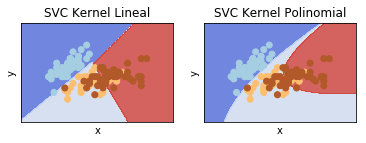

In [24]:
# importanto SVM
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# importando los datasets de sklearn
from sklearn import datasets

# importando el dataset iris
iris = datasets.load_iris()

X = iris.data[:, :2]  # solo tomamos las primeras 2 características
y = iris.target

h = .02  # tamaño de la malla del grafico

# Creando el SVM con sus diferentes métodos
C = 1.0  # parametro de regulacion SVM 
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

# crear el area para graficar
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# titulos de los graficos
titles = ['SVM Kernel Lineal','SVM Kernel Polinomial']


for i, clf in enumerate((svc, poly_svc)):
    # Realizando el gráfico, se le asigna un color a cada punto
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Graficando tambien los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()